# CS5785 Applied Machine Learning | Homework 3
-------------------------------------------------------------
Ziqing Li (zl648), Renata Anastasia (ra568)

Reference:
1. https://www.geeksforgeeks.org/ml-face-recognition-using-eigenfaces-pca-algorithm/
2. https://github.com/kuleshov/cornell-cs5785-2022-applied-ml/blob/main/slides/lecture11-dimensionality-reduction.ipynb

In [ ]:
import pandas as pd
import numpy as np

# 1. Eigenface for face recognition

a. Download The Face Dataset and unzip faces.zip, You will find a folder called images
which contains all the training and test images; train.txt and test.txt specifies the training set
and test (validation) set split respectively, each line gives an image path and the corresponding label.


In [ ]:
!pip install patool
import patoolib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.9 MB/s 


In [ ]:
patoolib.extract_archive('faces.zip')

patool: Extracting faces.zip ...
patool: running /usr/bin/7z x -o./Unpack_70vunjh4 -- faces.zip
patool: ... faces.zip extracted to `faces'.


'faces'

b.  Load the training set into a matrix X: there are 540 training images in total, each has 50 × 50 pixels that need to be concatenated into a 2500-dimensional vector. So the size of X should be 540×2500, where each row is a flattened face image. Pick a face image from X and display that image in grayscale. Do the same thing for the test set. The size of matrix Xtest for the test set should be 100×2500.

In [ ]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
from matplotlib.pyplot import imread
import matplotlib.cm as cm
%matplotlib inline

(540, 2500) (540,)


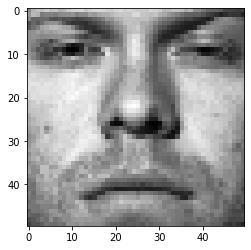

In [ ]:
#Import and split train data

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
  im = imread(line.strip().split()[0])
  train_data.append(im.reshape(2500,))
  train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)


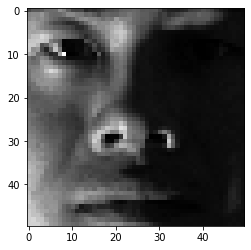

In [ ]:
#Import and split test data

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
  im = imread(line.strip().split()[0])
  test_data.append(im.reshape(2500,))
  test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

c. Average Face. Compute the average face µ from the whole training set by summing up
every row in X then dividing by the number of faces. Display the average face as a grayscale image.

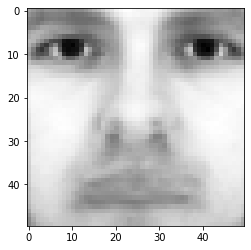

In [ ]:
avg_face= train_data.mean(axis=0)
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)

d. Mean Subtraction. Subtract average face µ from every row in X. That is, xi:= xi − µ, where xi is the i-th row of X. Pick a face image after mean subtraction from the new X and display that image in grayscale. Do the same thing for the test set Xtest using the precomputed average face µ in (c).


(540, 2500)


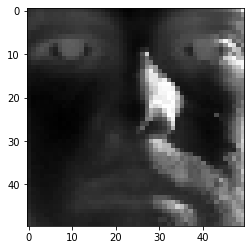

In [ ]:
substract_mean_train= train_data- avg_face
print(substract_mean_train.shape)
plt.imshow(substract_mean_train[5, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500)


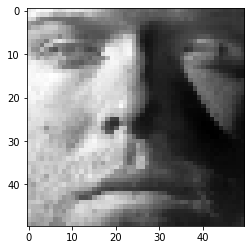

In [ ]:
substract_mean_test= test_data- avg_face
print(substract_mean_test.shape)
plt.imshow(substract_mean_test[5, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

e. Eigenface. Perform eigendecomposition on X^T X = V Λ V^T
to get eigenvectors V^T, where each row of V^T has the same dimension as the face image. We refer to v_i, the i-th row of V^T, as i-th eigenface. Display the first 10 eigenfaces as 10 images in grayscale

In [ ]:
train_transpose= substract_mean_train.transpose()
xtx= train_transpose @ substract_mean_train
print(xtx.shape)

(2500, 2500)


In [ ]:
eigenvalue, eigenvector = np.linalg.eig(xtx)

In [ ]:
#Sort Eigenvalues
idx = eigenvalue.argsort()[::-1]
eigenvalue = eigenvalue[idx]

#get sorted eigenvectors and construct a matrix
inv_eigenvector = np.linalg.inv(eigenvector)
inv_eigenvector= np.asmatrix(inv_eigenvector, dtype='f')
inv_eigenvector=inv_eigenvector[idx,:]

#construct diagonal matrix for eigenvalues
diag_eigenvalue = np.diag(eigenvalue)

#check eigenvalues and eigen vectors
#new_vector = np.dot(eigenvector,np.dot(diag_eigenvalue, inv_eigenvector)) 
#new_vector= new_vector.round()
#print(new_vector[5,:])
#print(xtx[5,:])

/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


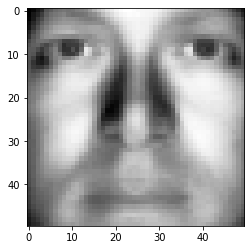

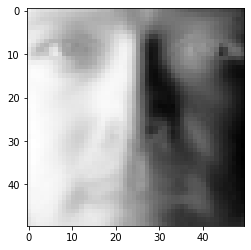

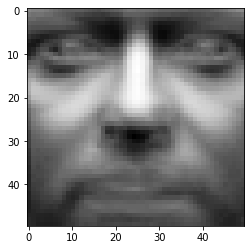

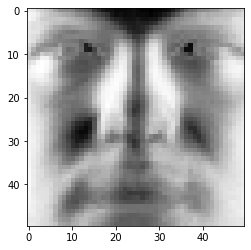

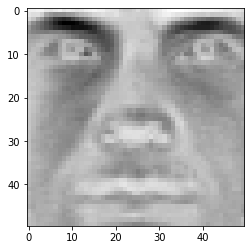

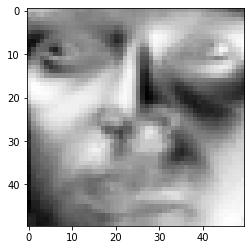

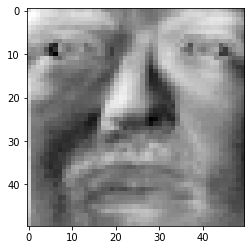

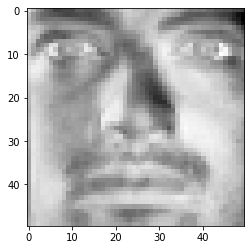

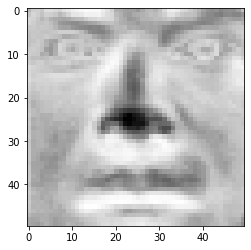

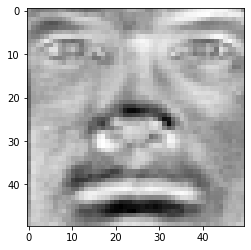

In [ ]:
n=10
for i in range(n): 
  plt.imshow(inv_eigenvector[i, :].reshape(50,50), cmap = cm.Greys_r,)
  plt.show()

f. Eigenface Feature. The top r eigenfaces V^T [: r,:] = {v1, v2,..., vr }^T span an r -dimensional linear subspace of the original image space called face space, whose origin is the average face µ, and whose axes are the eigenfaces {v1, v2,..., vr }. Therefore, using the top r eigenfaces
{v1, v2,..., vr }, we can represent a 2500-dimensional face image z as an r -dimensional feature vector f: f = V^T [: r,:] z = [v1, v2,..., vr ]^T z. 
Write a function to generate r -dimensional feature matrix F and Ftest for training images X and test images Xtest, respectively (to get F, multiply X to the transpose of first r rows of V^T, F should have same number of rows as X and r columns; similarly for Xtest).

In [ ]:
print(eigenvalue)

[ 3.00960209e+04+0.00000000e+00j  2.55476987e+04+0.00000000e+00j
  3.94495049e+03+0.00000000e+00j ... -4.95413431e-13+4.90320076e-14j
 -4.95413431e-13-4.90320076e-14j -5.13621337e-13+0.00000000e+00j]


In [ ]:
def generate_rd_matrix (X,r):
    F=np.matmul(X,inv_eigenvector[:r,:].transpose())
    return F

g. Face Recognition. For this problem, you are welcome to use libraries such as scikit learn to perform logistic regression. Extract training and test features for r = 10. Train a Logistic Regression model using F and test on Ftest. Report the classification accuracy on the test set. Plot the classification accuracy on the test set as a function of r when r = 1,2,...,200. Use “one-vs-rest” logistic regression, where a classifier is trained for each possible output label. Each classifier is trained on faces with that label as positive data and all faces with other labels as negative data. sklearn calls this the “ovr” mode

In [ ]:
#get feature matrix for train & test dataset when r=10
feature_matrix_train=generate_rd_matrix (substract_mean_train,10)
feature_matrix_test=generate_rd_matrix (substract_mean_test,10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train softmax on non-PCA data
#logreg1 = LogisticRegression(random_state=0, C=1e5, multi_class='ovr')
#logreg1.fit(train_data[:,:10], train_labels)
#print('Accuracy on first 10 dimensions: %.2f' % logreg1.score(train_data[:,:10], train_labels))

# train softmax on PCA data
logreg2 = LogisticRegression(random_state=0, C=1e5, multi_class='ovr')
model = logreg2.fit(feature_matrix_train.real, train_labels)
print('Accuracy on 10 PCA dimensions: %.2f' % logreg2.score(feature_matrix_train.real,train_labels))

Accuracy on 10 PCA dimensions: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Make predictions on test dataset
test_pred=model.predict(feature_matrix_test.real)

In [ ]:
#calculate accuracy score for the predictions
accuracy_score(test_labels, test_pred)

0.83

In [ ]:
accuracy=[]
for r in range(200):
    F_train=generate_rd_matrix (substract_mean_train,r+1)
    F_test=generate_rd_matrix (substract_mean_test,r+1)
    model = logreg2.fit(F_train, train_labels)
    test_pred=model.predict(F_test)
    accuracy.append(accuracy_score(test_labels, test_pred))
accuracy

Streaming output truncated to the last 5000 lines.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: Fut

[0.14,
 0.13,
 0.12,
 0.17,
 0.41,
 0.37,
 0.5,
 0.64,
 0.73,
 0.8,
 0.83,
 0.85,
 0.88,
 0.87,
 0.87,
 0.9,
 0.88,
 0.85,
 0.85,
 0.85,
 0.86,
 0.86,
 0.88,
 0.89,
 0.91,
 0.91,
 0.88,
 0.88,
 0.89,
 0.91,
 0.92,
 0.91,
 0.89,
 0.9,
 0.91,
 0.91,
 0.92,
 0.93,
 0.94,
 0.94,
 0.95,
 0.95,
 0.95,
 0.96,
 0.95,
 0.96,
 0.95,
 0.96,
 0.94,
 0.95,
 0.96,
 0.95,
 0.94,
 0.94,
 0.95,
 0.96,
 0.96,
 0.95,
 0.94,
 0.94,
 0.95,
 0.94,
 0.95,
 0.94,
 0.95,
 0.95,
 0.95,
 0.96,
 0.95,
 0.95,
 0.94,
 0.94,
 0.94,
 0.94,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.96,
 0.95,
 0.95,
 0.96,
 0.95,
 0.95,
 0.96,
 0.96,
 0.96,
 0.97,
 0.96,
 0.96,
 0.97,
 0.96,
 0.96,
 0.95,
 0.96,
 0.96,
 0.96,
 0.97,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.95,
 0.95,
 0.96,
 0.95,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.95,
 0.96,
 0.96,
 0.96,
 0.96,
 0.

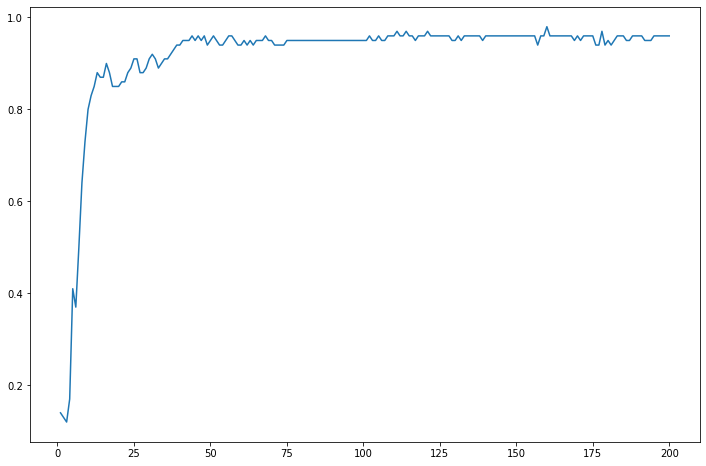

In [ ]:
rlst=list(range(1,201))
f, ax = plt.subplots(figsize=(12,8))
plt.plot(rlst, accuracy)
plt.show()

# 2. EM Algorithm

a. Treat each data entry as a 2 dimensional feature vector. Parse and plot all data points
on 2-D plane.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
!pip install pydataset
from pydataset import data

df = data('faithful')
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 12.0 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=5c746ace76ac571c4a15b9eb31666a6a417802b9790b6363a2c7f14eeb4e41d3
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [ ]:
df.info

<bound method DataFrame.info of      eruptions  waiting
1        3.600       79
2        1.800       54
3        3.333       74
4        2.283       62
5        4.533       85
..         ...      ...
268      4.117       81
269      2.150       46
270      4.417       90
271      1.817       46
272      4.467       74

[272 rows x 2 columns]>

In [ ]:
X=df.to_numpy()
X

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


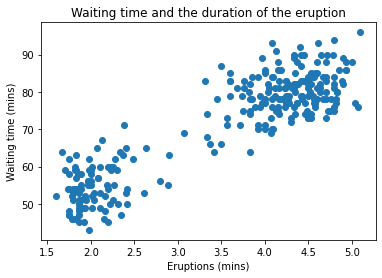

In [ ]:
plt.scatter(df['eruptions'], df['waiting'])
plt.ylabel("Waiting time (mins)")
plt.xlabel("Eruptions (mins)")
plt.title("Waiting time and the duration of the eruption")
plt.show()

b. Write the expression for $Pθ_t (z =k |x)$, which is the posterior of each data point x(i)

$Pθ_t (z =k |x) = \frac{Pθ_t (z =k, x)}{Pθ_t (x)} = \frac{Pθ_t (z =k, x)}{\sum_{l=1}^{k} Pθ_t (x|z =l)Pθ_t (z =l)}$.

In [ ]:
#define 2-D normal distribution
def multivariate_normal(x, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [ ]:
def E_step (X, mean1, mean2, cov1, cov2, prior1, prior2):
    post1_lst=[]
    post2_lst=[]
    for i in range(len(X)):
        posterior1=multivariate_normal(X[i], mean1, cov1)* prior1 / (multivariate_normal(X[i], mean1, cov1)* prior1
                                                                          + multivariate_normal(X[i], mean2, cov2)* prior2)
        posterior2=multivariate_normal(X[i], mean2, cov2)* prior2 / (multivariate_normal(X[i], mean1, cov1)* prior1
                                                                          + multivariate_normal(X[i], mean2, cov2)* prior2)
        post1_lst.append(posterior1)
        post2_lst.append(posterior2)
    return post1_lst,post2_lst

c. Write down the formula for μk, Σk, and for the parameters φat the M-step

$\mu_k= \frac{\sum_{i=1}^{n}P(z=k| x^{(i)}x^{(i)}}{n_k}$

$\sigma_k= \frac{\sum_{i=1}^{n}P(z=k| x^{(i)}(x^{(i)}-\mu_k)(x^{(i)}-\mu_k)^T}{n_k}$ 

$n_k = \sum_{i=1}^{n} P(z=k|x^{(i)})$

$\phi_k= \frac{n_k}{n}$



In [ ]:
def M_step (X, post1_lst, post2_lst):
    n=len(X)
    n1=sum(post1_lst)
    n2=sum(post2_lst)
    prior1=n1/n
    prior2=n2/n
    mean1=sum([i*j for (i, j) in zip(X, post1_lst)])/n1
    mean2=sum([i*j for (i, j) in zip(X, post2_lst)])/n2
    cov1=sum([p* np.matmul(np.expand_dims(x-mean1,axis=-1),
                           np.expand_dims(x-mean1,axis=0)) 
              for (x,p) in zip(X, post1_lst)])/n1
    cov2=sum([p* np.matmul(np.expand_dims(x-mean2,axis=-1),
                           np.expand_dims(x-mean2,axis=0)) 
              for (x,p) in zip(X, post2_lst)])/n2
    return prior1,prior2,mean1,mean2,cov1,cov2


d. Implement EM algorithm

i. Implement the EM algorithm from scratch (e.g., in Python and numpy).

In [ ]:
#initialize the parameters
mean1=np.array([1.7,60.0])
mean2=np.array([4.5,90.0])
n=len(X)
n1=sum(np.linalg.norm(x-mean1)<np.linalg.norm(x-mean2) for x in X)
n2=sum(np.linalg.norm(x-mean1)>=np.linalg.norm(x-mean2) for x in X)
prior1=n1/n
prior2=n2/n
cov1=sum([(np.linalg.norm(x-mean1)<np.linalg.norm(x-mean2))* 
          np.matmul(np.expand_dims(x-mean1,axis=-1),
                    np.expand_dims(x-mean1,axis=0)) 
          for x in X])/n1
cov2=sum([(np.linalg.norm(x-mean1)>=np.linalg.norm(x-mean2))* 
          np.matmul(np.expand_dims(x-mean2,axis=-1),
                    np.expand_dims(x-mean2,axis=0))
          for x in X])/n2

ii. Choose a termination criterion for when the algorithm stops repeating the E-step and the M-step. State your termination criterion and explain the reasoning behind it.

In [ ]:
# EM iterations until delta < 0.005

delta=1
mean1_lst=np.expand_dims(mean1,axis=0)
mean2_lst=np.expand_dims(mean2,axis=0)

while delta>0.001:
    post1_lst,post2_lst=E_step (X, mean1, mean2, cov1, cov2, prior1, prior2)
    prior1,prior2,mean1_new,mean2_new,cov1,cov2=M_step (X, post1_lst, post2_lst)
    delta=np.maximum(np.linalg.norm(mean1_new-mean1),np.linalg.norm(mean2_new-mean2))
    mean1=mean1_new
    mean2=mean2_new
    mean1_lst=np.vstack((mean1_lst,mean1))
    mean2_lst=np.vstack((mean2_lst,mean2))


In [ ]:
mean1_lst

array([[ 1.7       , 60.        ],
       [ 2.30807681, 57.29323064],
       [ 2.19215581, 56.11254721],
       [ 2.11707228, 55.30197566],
       [ 2.07022638, 54.8283823 ],
       [ 2.04365171, 54.56812938],
       [ 2.03774483, 54.49306816],
       [ 2.03669642, 54.48164837],
       [ 2.03646168, 54.47925453],
       [ 2.03640603, 54.47869328]])

In [ ]:
mean2_lst

array([[ 4.5       , 90.        ],
       [ 4.35108952, 80.85231012],
       [ 4.34060048, 80.6286296 ],
       [ 4.32375946, 80.40827077],
       [ 4.30655503, 80.17822649],
       [ 4.29468234, 80.02074458],
       [ 4.29081206, 79.9815638 ],
       [ 4.28993291, 79.97137449],
       [ 4.28972669, 79.96889714],
       [ 4.28967752, 79.96830322]])

iii. Plot the trajectories of the two mean vectors (μ1 and μ2) in two dimensions as they change over the course of running EM. You might want to use a scatter plot for this.

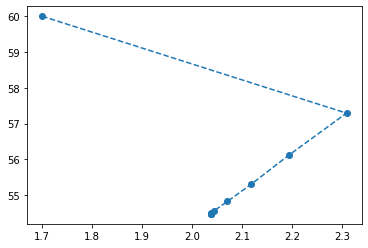

In [ ]:
plt.plot(mean1_lst.T[0],mean1_lst.T[1],linestyle='--', marker='o')
plt.show()

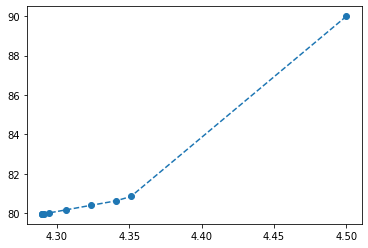

In [ ]:
plt.plot(mean2_lst.T[0],mean2_lst.T[1],linestyle='--', marker='o')
plt.show()

e. run KNN

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.cluster_centers_

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

The results from clustering is very close to the results from EM algotrithm, because they basically share the same method of finding centers - using iteration to gradually improve the estimations and assignments alternatingly until the estimations converge. It's a little bit different most likely due to the stopping condition we've defined.